# Evaluierung Lemmatisierung mit GPT-3

## Inhalt
1. [Analyse der Ausgabeformate](#Ausgabeformate)
2. [Einlesen der Ausgaben](#Einlesen)
3. [Ergebnisse und Analysen](#Ergebnisse)

In [9]:
import glob
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

## Ausgabeformate

Ausgabeformate auf die Eingabeaufforderung `Lemmatisiere die Tokenliste: ['token1', 'token2', ...]` fallen sehr unterschiedlich aus. Die häufigsten wurden ausgezählt:

* `list-notation`: `['lemma']`
* `list-notation-without-quot`: `[lemma]`
* `:-notation`: `token:lemma\n`
* `--notation`: `token-lemma\n`
* `comma-separated`: `lemma,lemma,lemma`
* `whitespace-separated`: `lemma lemma lemma`
* `+-separated`: `lemma+lemma+lemma`
* `|-separated`: `lemma|lemma|lemma`
* `_-separated`: `lemma_lemma_lemma`
* `error`: alle übrigen, unter anderem Tuple-Notation

In [10]:
with open("gpt3_outputs/formats.json", "r") as fp:
    formats = json.load(fp)

In [11]:
df = pd.DataFrame.from_dict(formats, orient='columns')
df = df.set_index('dataset')
df['error_num'] = df.error.str.len()  # number of errors

In [12]:
df.sum()

list-notation                                                              4785
list-notation-without-quot                                                  188
:-notation                                                                    0
--notation                                                                    0
comma-separated                                                             272
whitespace-separated                                                        675
+-separated                                                                   1
|-separated                                                                 275
_-separated                                                                 545
other                                                                        []
error                         [[('(', '('), ('Bei', 'bei'), ('den', 'der'), ...
error_num                                                                    56
dtype: object

Die meisten Ausgaben sind in Listennotation (4785), weitere sind durch Leerzeichen (675) oder Unterstriche (545) getrennt.

## Einlesen

In [27]:
with open("results-gpt3.json", "r") as fp:
    results = json.load(fp)

In [28]:
d = pd.DataFrame.from_dict(results, orient='columns')
#d = d.set_index('dataset')

In [32]:
acc = []
prec = []
rec = []
for entry in d.metrics:
    acc.append(entry['overall']['accuracy'])
    prec.append(entry['overall']['adj_precision'])
    rec.append(entry['overall']['adj_recall'])
d['accuracy'] = acc
d['precision'] = prec
d['recall'] = rec

## Ergebnisse

<AxesSubplot:xlabel='dataset'>

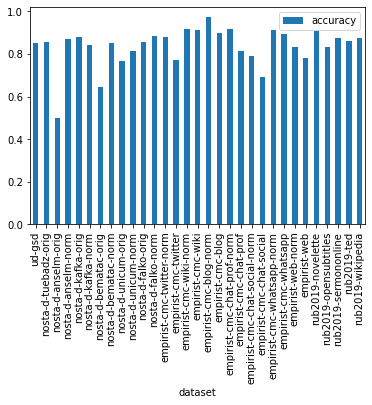

In [30]:
d.plot.bar(x='dataset', y='accuracy')

<AxesSubplot:>

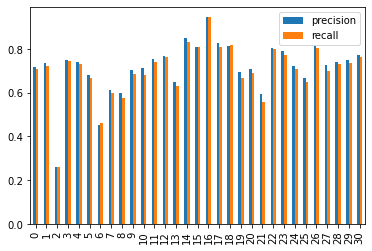

In [36]:
d2 = d[['dataset', 'precision', 'recall']]
d2.set_index('dataset')
d2.plot.bar()